In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
train = pd.read_csv("4_mnist_train.csv",sep=",")

In [18]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train = train.loc[:,"1x1":"28x28"]
y_train = train.iloc[:,0]

# PCA

In [20]:
# Perform a prinicpal component analysis with the training dataset.
# How much of the variance is explained by the first 10 components?
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.sum(pca.explained_variance_ratio_)

0.48814975469886224

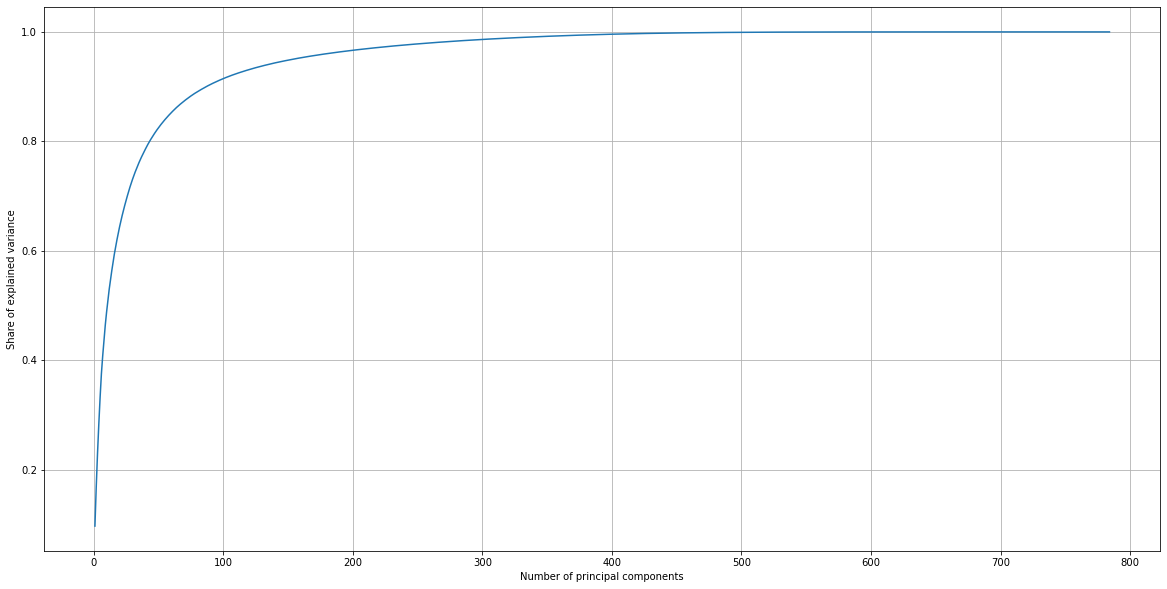

In [21]:
# Create a line graph with number of principal components (x) vs. Share of explained variance (y)
pca = PCA(n_components=784)
pca.fit(X_train)
cum_explained = np.cumsum(pca.explained_variance_ratio_)
cum_explained
plt.figure(figsize=(20,10))
plt.plot(range(1,785),cum_explained)
plt.xlabel("Number of principal components")
plt.ylabel("Share of explained variance")
plt.grid()
plt.show()

Original


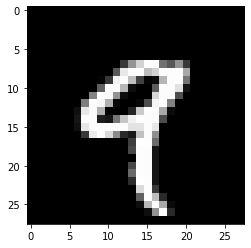

First 200 components


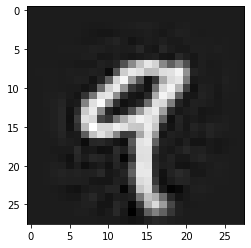

In [22]:
# Compare the original pictures to the pictures of the reconstructed values
# Try different number of principal components and different cases
n = 4
m = 200
print("Original")
pic = np.array(X_train.iloc[n,:]).reshape(28,28)
plt.imshow(pic, cmap="gray")
plt.show()
print("First " + str(m) + " components")
pca = PCA(n_components=m)
pca.fit(X_train)
X_projected = pca.transform(X_train)
X_recovered = pca.inverse_transform(X_projected)
pic = np.array(X_recovered[n,:]).reshape(28,28)
plt.imshow(pic, cmap="gray")
plt.show()

# PCA and Classification

In [23]:
test = pd.read_csv("Lecture_07a_mnist_test.csv",sep=",")
X_test = test.loc[:,"1x1":"28x28"]
y_test = test.iloc[:,0]

In [24]:
# Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
# Store this reduced dataset as X_train_reduced and X_test_reduced
from sklearn.decomposition import PCA
t0 = time.time()
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
t1 = time.time()
print(t1-t0)

10.399052858352661


In [25]:
# Train a logistic classifier on the dataset and time how long it takes
# Then evaluate the resulting model on the test set.
from sklearn.linear_model import LogisticRegression
t0 = time.time()
log1 = LogisticRegression(max_iter=100)
log1.fit(X_train,y_train)
t1 = time.time()
print(t1-t0)
print(log1.score(X_train,y_train))
print(log1.score(X_test,y_test))

C:\Users\stwey001\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


33.7421088218689
0.9339166666666666
0.9255


In [26]:
# Train a new logistic regression classifier on the reduced dataset and see how long it takes.
# Was training much faster? Next, evaluate the classifier on the test set. 
# How does it compare to the previous classifier?
from sklearn.linear_model import LogisticRegression
t0 = time.time()
log2 = LogisticRegression(max_iter=100)
log2.fit(X_train_reduced,y_train)
t1 = time.time()
print(t1-t0)
print(log2.score(X_train_reduced,y_train))
print(log2.score(X_test_reduced,y_test))

13.968097448348999
0.9218833333333334
0.9201


C:\Users\stwey001\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Train a Random Forest classifier on the original dataset and time how long it takes
# Then evaluate the resulting model accuracy on the test set.
from sklearn.ensemble import RandomForestClassifier
t0 = time.time()
forest1 = RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=40)
forest1.fit(X_train,y_train)
t1 = time.time()
print(t1-t0)
print(forest1.score(X_train,y_train))
print(forest1.score(X_test,y_test))

5.883307695388794
0.9999666666666667
0.965


In [28]:
# Train a new Random Forest classifier on the reduced dataset and see how long it takes.
# Was training much faster? Next, evaluate the classifier on the test set. 
# How does it compare to the previous classifier?
from sklearn.ensemble import RandomForestClassifier
t0 = time.time()
forest2 = RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=40)
forest2.fit(X_train_reduced,y_train)
t1 = time.time()
print(t1-t0)
print(forest2.score(X_train_reduced,y_train))
print(forest2.score(X_test_reduced,y_test))

13.059140920639038
0.9999666666666667
0.9393


# PCA and Manifold Learning

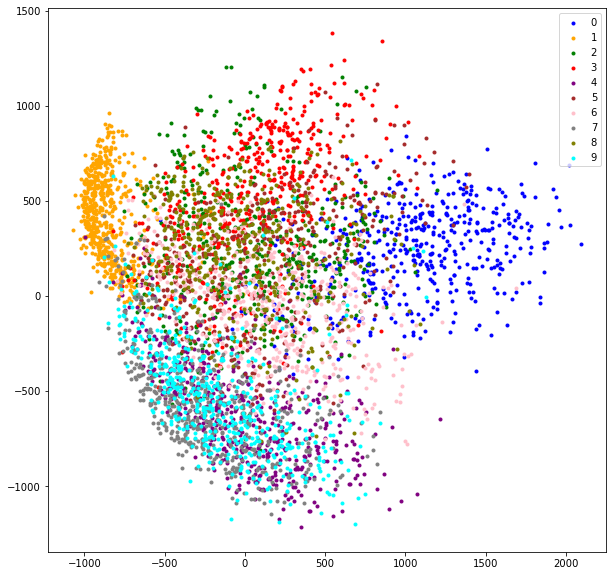

In [29]:
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_train.iloc[:5000,:])
colors = ["blue","orange","green","red","purple","brown","pink","grey","olive","cyan"]
plt.figure(figsize=(10,10))
for i in range(10):
    Z = X_projected[y_train[:5000] == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

In [30]:
from sklearn.manifold import TSNE
t0 = time.time()
tsne = TSNE(random_state=12, n_jobs=-1)
X_projected = tsne.fit_transform(X_train.iloc[:3000,:])
t1 = time.time()
print(t1-t0)

41.53511428833008


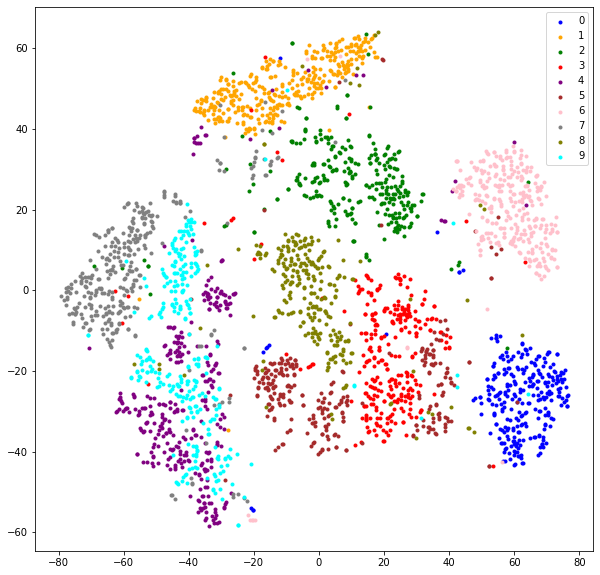

In [31]:
colors = ["blue","orange","green","red","purple","brown","pink","grey","olive","cyan"]
plt.figure(figsize=(10,10))
for i in range(10):
    Z = X_projected[y_train[:3000] == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_projected[:,:200], y_train[:3000], random_state=20)

In [33]:
# Train a new Random Forest classifier based on the t-SNE components and see how long it takes.
# Evaluate the training and test accuracy.
from sklearn.ensemble import RandomForestClassifier
t0 = time.time()
forest3 = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=40)
forest3.fit(X1_train,y1_train)
t1 = time.time()
print(t1-t0)
print(forest3.score(X1_train,y1_train))
print(forest3.score(X1_test,y1_test))

0.48444700241088867
1.0
0.9186666666666666


In [34]:
# Train a new logistic regression classifier based on the t-SNE components and see how long it takes.
# Evaluate the training and test accuracy.
from sklearn.linear_model import LogisticRegression
t0 = time.time()
log3 = LogisticRegression(max_iter=10000)
log3.fit(X1_train,y1_train)
t1 = time.time()
print(t1-t0)
print(log3.score(X1_train,y1_train))
print(log3.score(X1_test,y1_test))

2.914583921432495
0.7413333333333333
0.724
